# 05_고급 인덱싱
### 1. 인덱스 배열로 인덱싱
- 배열의 인덱싱을 단일 숫자가 아닌 넘파이 배열을 이용

In [1]:
import numpy as np

In [2]:
A = np.arange(12)**2

In [3]:
A

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [4]:
A[2]

4

In [5]:
A[2:6]

array([ 4,  9, 16, 25])

In [6]:
i = np.array([1,1,3,8,5])  # 인덱스를 배열로 저장

In [7]:
A[i]  # 배열을 통한 인덱싱

array([ 1,  1,  9, 64, 25])

In [8]:
 # 인덱스를 2차원으로 생성
j = np.array([[3,4], [9,7]])

In [9]:
A[j]

array([[ 9, 16],
       [81, 49]])

=> 배열을 이용한 인덱싱한 결과는 인덱스 배열의 모양을 그대로 따라감

- 이미지 저장을 팔레트의 인덱스 배열을 이용해 저장하는 예(설명하기 위한 예로 이렇게 사용하지는 않음)

In [10]:
palette = np.array([[0,0,0],          # black
                    [255,0,0],        # red
                    [0,255,0],        # green
                    [0,0,255],        # blue
                    [255,255,255]])   # white

In [11]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

In [12]:
image_data = palette[image_index]

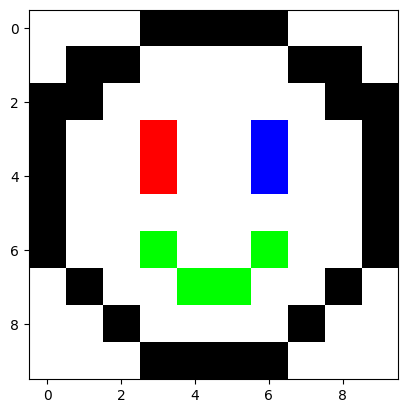

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(image_data, interpolation='nearest')
plt.show()

### 2. 다차원 인덱싱
- 다차원 인덱싱 : 다차원 배열로 인덱스 정의.  
  각 차원에 대한 인덱스 배열은 동일한 모양이어야 함.

In [14]:
A = np.arange(12).reshape(3,4)

In [15]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
A[np.array([[0,1], [1,2]]),]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [17]:
A[np.array([[0,1], [1,2]]), np.array([[2,1], [3,3]])]

array([[ 2,  5],
       [ 7, 11]])

=> 인덱스 배열로 인덱싱할 경우 그 결과는 인덱스 배열의 모양과 같다.

### 3. 인덱싱을 이용한 값 변경
- 배열을 대상으로 인덱싱을 사용해서 값 변경 가능

In [18]:
A = np.arange(5)

In [19]:
A

array([0, 1, 2, 3, 4])

In [20]:
A[[1,3,4]] = 0  # 배열 인덱스를 이용한 값 변경

In [21]:
A

array([0, 0, 2, 0, 0])

In [22]:
A[1] = 100
A

array([  0, 100,   2,   0,   0])

In [23]:
A[1,3,4] = 10  # 이것은 축을 이용한 것임.

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [24]:
A = np.arange(5)

In [25]:
A

array([0, 1, 2, 3, 4])

In [26]:
A[[0,0,2]] = [10,20,30]  # 동일 인덱스를 포함할 경우 가장 마지막 값이 할당

In [27]:
A

array([20,  1, 30,  3,  4])

In [28]:
A = np.arange(5)

In [29]:
A[[0,0,2]] += 1  # += 연산자는 예상대로 동작하지 하지않을 수 있음

In [30]:
A

array([1, 1, 3, 3, 4])

### 4. ix_() 함수
- **ix_()** : N개의 1차원 시퀀스 입력받아 추출해서 각각 N차원인 N개의 출력을 반환  
  (모든 요소들의 연산 쌍을 구할 때 많이 사용)  
- 결과의 모양(shape)은 1차원을 제외한 모든 차원이 1

In [31]:
A = np.array([2,3,4,5])
B = np.array([8,5,4])

In [32]:
np.ix_(A, B)  # 1차원 2개를 입력받아서 -> 2차원, A는 1축으로 B는 2축으로 반환

(array([[2],
        [3],
        [4],
        [5]]),
 array([[8, 5, 4]]))

In [33]:
A = np.array([2,3,4,5])
B = np.array([8,5,4])
C = np.array([5,4,6,8,3])

In [34]:
np.ix_(A, B, C)  # 1차원 3개 입력 -> 3차원, A는 0축, B는 1축, C는 2축으로 반환

(array([[[2]],
 
        [[3]],
 
        [[4]],
 
        [[5]]]),
 array([[[8],
         [5],
         [4]]]),
 array([[[5, 4, 6, 8, 3]]]))

- A, B, C 배열의 모든 쌍에 대해서A + B * C를 계산할 때 ix_() 함수를 사용  

In [35]:
AX, BX = np.ix_(A,B)

In [36]:
AX + BX

array([[10,  7,  6],
       [11,  8,  7],
       [12,  9,  8],
       [13, 10,  9]])

In [37]:
# A + B * C
AX, BX, CX = np.ix_(A,B,C)

In [38]:
AX + BX * CX

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

### 5. 리듀스 함수 구현
- **리듀스함수** : 매개변수로 함수와 값들(iterable)을 입력받아 각 요소들에 함수를 적용하고 하나의 결과값을 반환하는 함수  

In [39]:
A = np.array([2,3,4,5])
B = np.array([8,5,4])

In [40]:
def reduce_func(*arrs, func=np.add):
    aix = np.ix_(*arrs)
    result = aix[0]

    for item in aix[1:]:
        result = func(result, item)
    return result

=> ix_() 함수를 응용해서 1차원 배열과 함수(np.add 또는 np.multiply)를 입력받아 배열의 모든 가능한 조합의 연산을 구한 후 하나의 값을 반환하는 함수를 만들 수 있음

In [41]:
A

array([2, 3, 4, 5])

In [42]:
B

array([8, 5, 4])

In [43]:
reduce_func(A, B)

array([[10,  7,  6],
       [11,  8,  7],
       [12,  9,  8],
       [13, 10,  9]])

In [44]:
reduce_func(A,B, func=np.divide)

array([[0.25 , 0.4  , 0.5  ],
       [0.375, 0.6  , 0.75 ],
       [0.5  , 0.8  , 1.   ],
       [0.625, 1.   , 1.25 ]])

- 논리값을 이용해서 인덱싱 가능

In [45]:
A = np.arange(20).reshape(4,5)

In [46]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [47]:
A % 2 == 0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [48]:
A[A%2 == 0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

- 논리배열을 이용해서 인덱싱을 할 때에도 할당값을 받을 수 있음

In [49]:
A[A%2 == 0] = A[A%2 == 0]**2

In [50]:
A

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

In [51]:
A[A%2 == 0] = 0

In [52]:
A

array([[ 0,  1,  0,  3,  0],
       [ 5,  0,  7,  0,  9],
       [ 0, 11,  0, 13,  0],
       [15,  0, 17,  0, 19]])

[정리]

    - 인덱스 배열로 인덱싱  
    - ix_()